<h1 align= center; style="color: white;background-color:black;
         font-size:47px; font-weight:bold;padding:20px;
    font-style:italic;border:3px  solid black;
    box-shadow:2px 2px 5px gray;text-align:center;border-radius:5px;
">   WHOLESALE CUSTOMERS DATASET </span></h1>


<div style="display: flex; justify-content: center;">
  <img src="C:\Users\hp\Desktop\projects\wholesale2.jpg" 
       style="width: 100%; height: auto; border-radius:10px; background-color:#f0f0f0;">
</div>

<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Importing Libraries</h1> 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import skfuzzy as fuzz
from tabulate import tabulate




<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">READING THE Dataset</h1>

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Wholesale customers data.csv")

In [3]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


##### channel : type of customer purchasing wholesale products
##### 1 (Horeca) – Customers such as Hotels, Restaurants, and Cafés that typically purchase in bulk and focus on fresh and perishable items.
##### 2 (Retail) – Retail stores that sell products directly to end consumers and often purchase packaged and non-perishable goods.
##### Region  :geographical location of the customer.
##### 1 – Lisbon
##### 2 – Oporto
##### 3 – Other regions
##### Fresh : annual expenditure on fresh products by the customer.
##### Milk  : annual spending on milk and dairy products.
##### Grocery : annual expenditure on grocery products
##### Frozen  : annual spending on frozen products.
##### Detergents_Paper : annual expenditure on detergents and paper products.
##### Delicassen : annual spending on delicatessen products.

 <h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> CHECKING SHAPE </h1>

In [4]:
df.shape

(440, 8)

<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">CHECKING INFO AND DESCRIBE </h1> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">  CHECKING NULL VALUES </h1> 

In [7]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> CHECKING UNIQUE VALUES IN EACH COLUMN </h1> 

In [8]:
cols=df.columns
for i in cols:
    u=df[i].unique()
    print(f'unique  alues of {i}',u)


unique  alues of Channel [2 1]
unique  alues of Region [3 1 2]
unique  alues of Fresh [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    14

In [9]:
dfc=df.copy()
dfc

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> SCALING </h1>

In [10]:
scaler=StandardScaler()
scaled=scaler.fit_transform(df)
df=pd.DataFrame(scaled,columns=df.columns)


In [11]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046



<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
   K-MEANS CLUSTERING
</div>



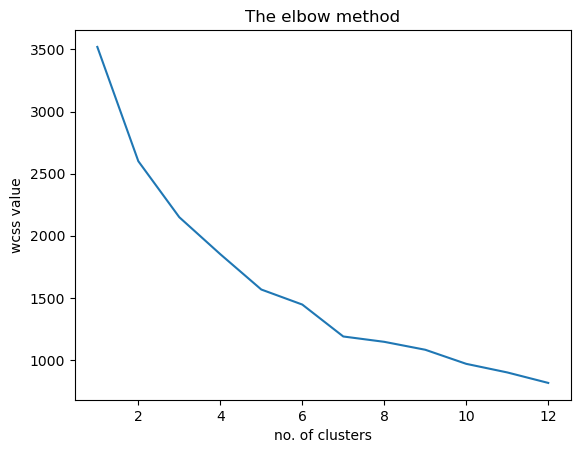

In [12]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)#random initialization method
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('The elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()


In [13]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)

In [14]:
y_kmeans

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [15]:
set(y_kmeans)

{np.int32(0), np.int32(1)}

In [16]:
score = silhouette_score(df, y_kmeans)
print("Silhouette Score:", score)
# moderate clustering quality


Silhouette Score: 0.37415730136485814


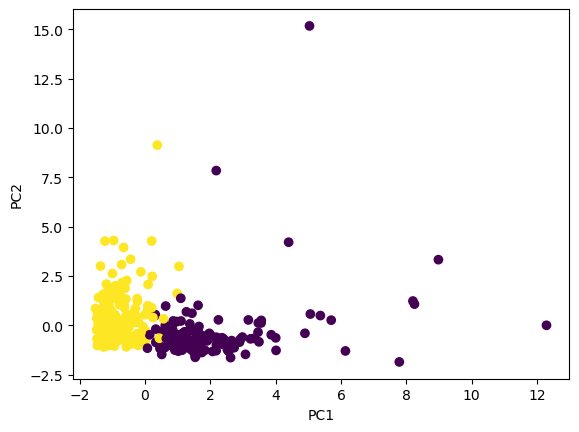

In [17]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

plt.scatter(reduced[:,0], reduced[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

K-Means clustering identifies two distinct groups of wholesale customers: one with lower and stable purchasing behavior, and another with higher and more varied spending patterns. This grouping supports better decision-making in pricing, inventory management, and marketing.

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
   DBSCAN
</div>

In [18]:
epsilon = 2.5

min_samples = 2
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(reduced)

In [19]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [20]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [21]:
score1 = silhouette_score(reduced,labels)
print("Silhouette Score:", score1)


Silhouette Score: 0.7262358665152834


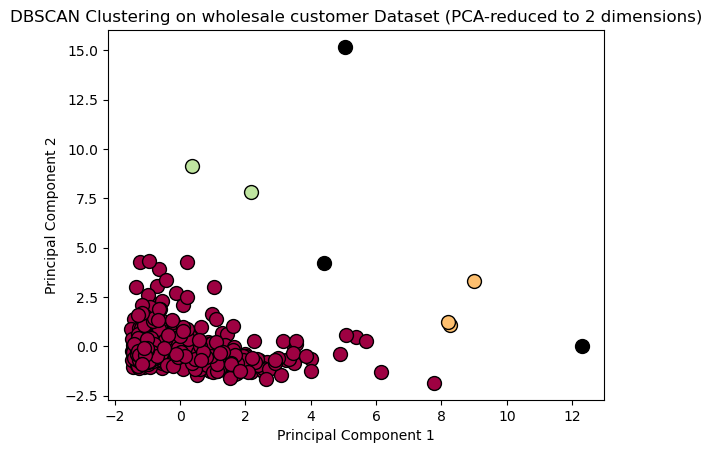

In [22]:
# Plot the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)#Creates a boolean array to identify points that belong to cluster k.
    xy = reduced[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on wholesale customer Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### Dense red cluster → majority of customers with similar purchasing behavior
#### Small colored clusters → distinct or less common spending patterns
#### Black points → noise / outliers (unusual customers)

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
HIERARCHICAL CLUSTERING</div>


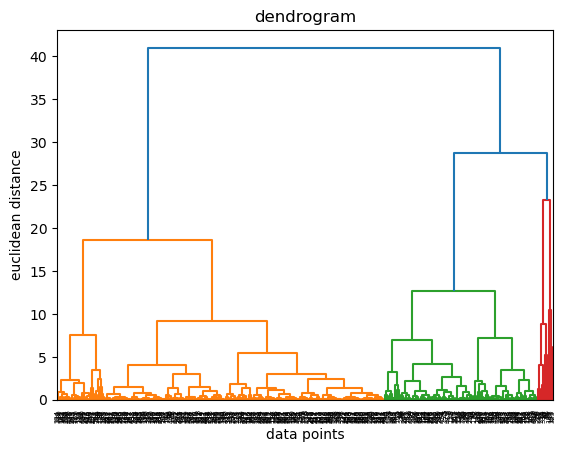

In [23]:
dendrogram=sch.dendrogram(sch.linkage(reduced,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [24]:
ahc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(reduced)

In [25]:
y_ahc

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [26]:
sil_ahc=silhouette_score(reduced,y_ahc)
sil_ahc

np.float64(0.5277226263245415)

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
FUZZY CLUSTERING</div>


In [27]:
X_fuzzy = reduced.T #Transpose Data for Fuzzy C-Means
#Find Optimal Number of Clusters (FPC Method)
fpc_values = []
cluster_range = range(2, 7)
for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X_fuzzy,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000
    )
    fpc_values.append(fpc)



In [28]:
#Measures quality of fuzzy partition
#Higher FPC = better clustering

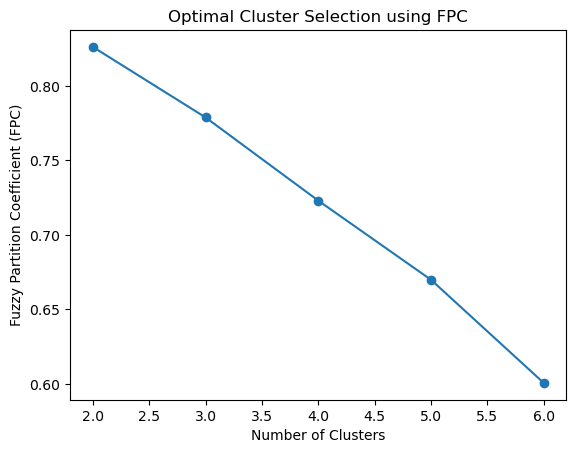

In [29]:
#Plot FPC vs Number of Clusters
plt.plot(cluster_range, fpc_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("Optimal Cluster Selection using FPC")
plt.show()


In [30]:
n_clusters = 4
m = 1.7
error = 1e-5
maxiter = 2000

In [31]:
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    X_fuzzy, c=n_clusters, m=m, error=error, maxiter=maxiter, init=None
)

hard_clusters = np.argmax(u, axis=0)

In [32]:
sil_sc=silhouette_score(reduced,hard_clusters)
sil_sc

np.float64(0.5349021232826991)

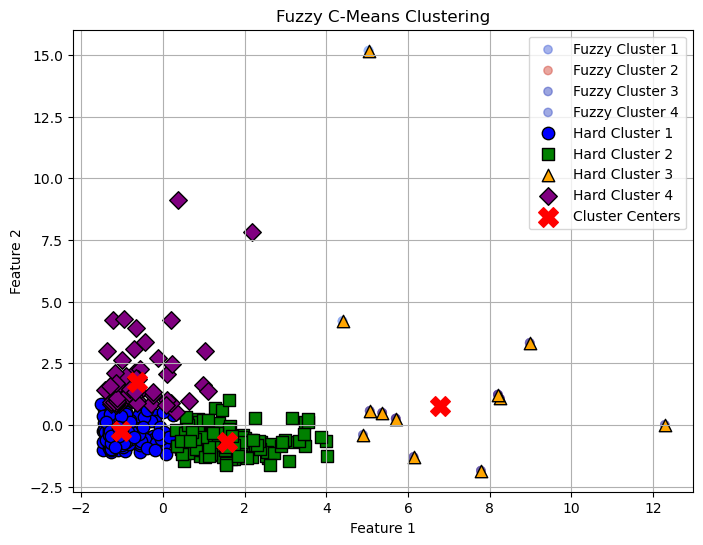

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot fuzzy memberships
for i in range(n_clusters):
    ax.scatter(X_fuzzy[0], X_fuzzy[1],
               c=u[i],
               cmap='coolwarm',
               alpha=0.5,
               label=f'Fuzzy Cluster {i+1}')

# Hard clusters from max membership
hard_clusters = np.argmax(u, axis=0)

markers = ['o', 's', '^','D']
colors = ['blue', 'green', 'orange','purple']

for i in range(n_clusters):
    cluster_points = X_fuzzy[:, hard_clusters == i]
    ax.scatter(cluster_points[0], cluster_points[1],
               c=colors[i],
               marker=markers[i],
               edgecolor='k',
               s=80,
               label=f'Hard Cluster {i+1}')

# Cluster centers
ax.scatter(cntr[:, 0], cntr[:, 1],
           c='red',
           marker='X',
           s=200,
           label='Cluster Centers')

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
ax.grid(True)
plt.show()


Customers do not belong to only one strict group

Some customers share traits across clusters

Color intensity represents membership strength

Brighter points → stronger belonging to that cluster

Faded points → shared membership with others

In [34]:
table=[['Clusters','silhouette score'],
       ['K-MEANS',score],['DBSCAN',score1],
       ['HIERARCHICAL',sil_ahc],['FUZZY',sil_sc]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════════════╤════════════════════╕
│ Clusters     │   silhouette score │
╞══════════════╪════════════════════╡
│ K-MEANS      │           0.374157 │
├──────────────┼────────────────────┤
│ DBSCAN       │           0.726236 │
├──────────────┼────────────────────┤
│ HIERARCHICAL │           0.527723 │
├──────────────┼────────────────────┤
│ FUZZY        │           0.534902 │
╘══════════════╧════════════════════╛


DBSCAN achieved the highest silhouette score, indicating strong cluster separation; however, Fuzzy and Hierarchical clustering provide more interpretable and flexible customer segmentation.

In [35]:
dfc['DBSCAN_Cluster'] = labels

numerical_cols = ["Channel","Region",	"Fresh",	"Milk",	"Grocery","Frozen",	"Detergents_Paper",	"Delicassen"]
summary = dfc.groupby('DBSCAN_Cluster')[numerical_cols].mean().round(2)
summary['Count'] = dfc['DBSCAN_Cluster'].value_counts()
summary = summary[["Channel","Region", "Fresh",	"Milk",	"Grocery","Frozen",	"Detergents_Paper",	"Delicassen"]]
summary = summary.sort_index()

print(summary)

                Channel  Region     Fresh      Milk   Grocery    Frozen  \
DBSCAN_Cluster                                                            
-1                 1.67    3.00  26445.67  42190.00  44989.67  14238.00   
 0                 1.32    2.54  11464.34   5118.63   7371.61   2822.45   
 1                 2.00    3.00  34444.33  55375.33  49094.33   4007.67   
 2                 1.00    2.50  72434.00  23205.50  15887.00  38807.00   

                Detergents_Paper  Delicassen  
DBSCAN_Cluster                                
-1                      15134.33    22470.00  
 0                       2651.14     1342.57  
 1                      23647.33     3128.33  
 2                       3110.00     7079.50  


In [37]:
dfc[['DBSCAN_Cluster']].value_counts()


DBSCAN_Cluster
 0                432
-1                  3
 1                  3
 2                  2
Name: count, dtype: int64

| Cluster        | Customer Type            | What These Customers Buy (Simple Explanation)                                   | What It Means for Business                | What the Owner Should Do                      |
| -------------- | ------------------------ | ------------------------------------------------------------------------------- | ----------------------------------------- | --------------------------------------------- |
| **Cluster 0**  | Regular Customers        | Buy common items like grocery, milk, and detergents regularly in normal amounts | They are steady and predictable customers | Maintain stock, give loyalty offers           |
| **Cluster 1**  | High-Value Customers     | Buy large quantities across many product types, including fresh and frozen      | Fewer in number but bring high revenue    | Provide bulk discounts and priority service   |
| **Cluster 2**  | Budget-Focused Customers | Mostly buy basic items like grocery and milk, with limited spending elsewhere   | Careful spenders who focus on essentials  | Offer value packs and price-based promotions  |
| **Noise (-1)** | Irregular Customers      | Buy very little or focus on one product only, sometimes buying only once        | Unpredictable and seasonal buyers         | Handle individually, avoid long-term planning |


## From this project, we can understand that wholesale customers do not all behave in the same way and can be meaningfully grouped based on their spending patterns.
## By applying different unsupervised learning techniques, we identified regular, high-value, budget-focused, and irregular customers.
## DBSCAN performed best for this dataset as it handled dense customer groups and detected outliers effectively.
## Overall, these insights help wholesalers improve inventory planning, pricing strategies, and customer-focused decision making.

# Use regular customers for stable income, high-value customers for profit growth, budget-focused customers for volume expansion, and treat irregular customers cautiously to avoid losses.